In [51]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
nobs=50
#inline backend pour voir les figures dans le frontend notebook https://ipython.readthedocs.io/en/stable/interactive/plotting.html
#observations=pd.DataFrame(data=np.loadtxt('results/observations.gnu'),columns=['x','obs']) #dataframe qui contient les observations sur lesquelles on travaille
gp=pd.DataFrame(data=np.loadtxt('results/gp.gnu'),columns=['x','mean1','mean2']) #0.9
gp2=pd.DataFrame(data=np.loadtxt('results/gp2.gnu'),columns=['x','mean','mean2']) #-0.1
gp3=pd.DataFrame(data=np.loadtxt('results/gp3.gnu'),columns=['x','mean','mean2']) #0.5
ei=pd.DataFrame(data=np.loadtxt('results/EIprob.gnu'),columns=['theta','ei','ei2'])

#récupération des thetas visités
thetas_visites_ei=pd.DataFrame(data=np.loadtxt('results/visited_points_ei.gnu'),columns=['theta','theta2'])

Text(0, 0.5, 'EI')

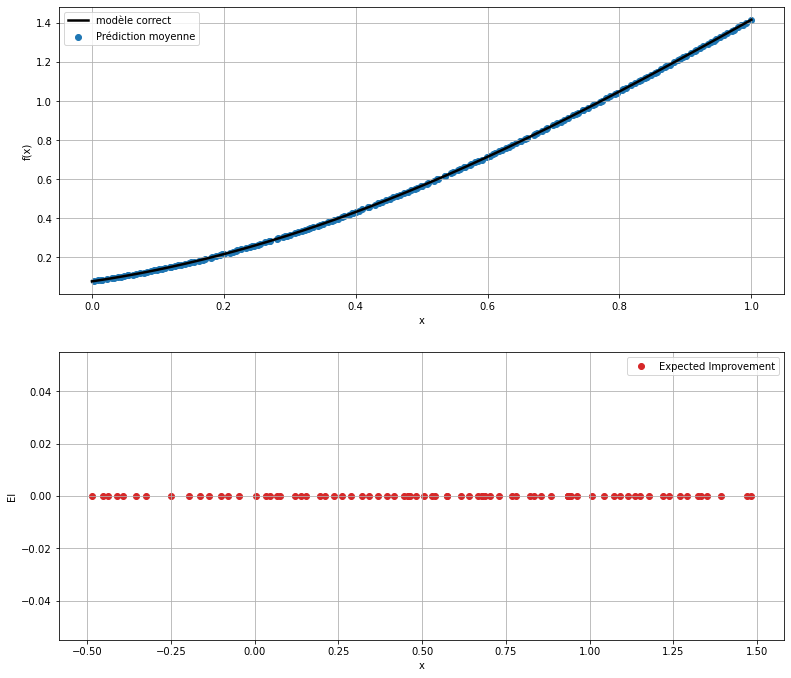

In [54]:

def f(x,theta):
    return np.sin(x*theta*2)*x+(x+0.15)*(1-theta)

thetaaff=0.5
X=np.linspace(0,1,500)

plt.figure(figsize=[13,18])
ax=plt.subplot(311)

plt.plot(X,f(X,thetaaff),color='black',linewidth=2.5,label='modèle correct')
plt.scatter('x','mean',data=gp3,label='Prédiction moyenne',color='tab:blue')
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')

ax=plt.subplot(312)
plt.scatter('theta','ei',data=ei,label='Expected Improvement',color='tab:red')
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('EI')



ValueError: x and y must be the same size

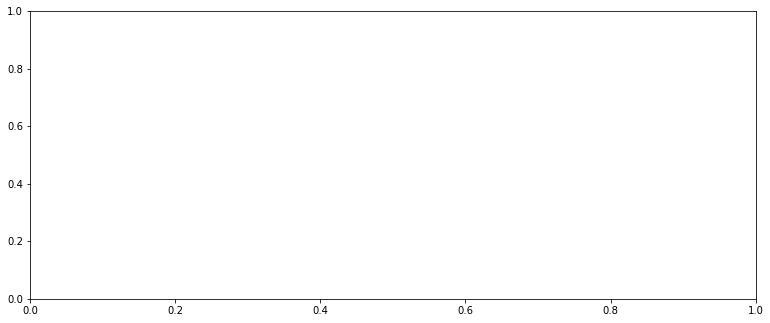

In [53]:
#affichage des thetas visités

plt.figure(figsize=[13,18])
ax=plt.subplot(311)
n=thetas_visites_ei.size

plt.scatter(x=np.ones(n),y='theta',data=thetas_visites_ei,label='Prédiction moyenne',color='tab:blue')
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')


NameError: name 'observations' is not defined

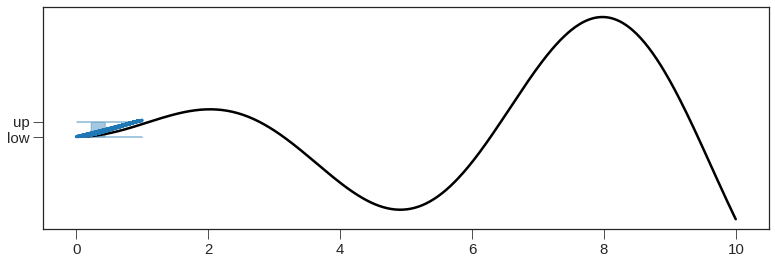

In [20]:
def f(x):
    return np.sin(x)*x

X=np.linspace(0,10,500)

plt.figure(figsize=[13,9])
ax=plt.subplot(211)

plt.plot(X,f(X),color='black',linewidth=2.5,label='g(x)= x sin(x)')
plt.plot('x','mean',data=gp,label='Prédiction moyenne',color='tab:blue')
ax.fill_between('x','mean','low',data=gp,alpha=0.4,color='tab:blue',label='')
ax.fill_between('x','mean','up',data=gp,alpha=0.4,color='tab:blue',label='Intervalles de confiance 1sigma')
ax.scatter(x='x',y='obs',label='observations',data=observations[0:nobs],marker='+',linewidth=4,color='tab:red')
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
ax=plt.subplot(212)

plt.plot('x','EI',data=gp,label='Expected Improvement',color='tab:red')
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('EI')